In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('scaler_apollo_hospitals.csv')

In [4]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [9]:
df['region'].nunique()

4

In [10]:
for i in df.columns:
    print(i, ' : ',df[i].nunique())

age  :  47
sex  :  2
smoker  :  2
region  :  4
viral load  :  462
severity level  :  6
hospitalization charges  :  1320


In [11]:
for i in df.columns:
    if df[i].nunique() < 7:
        df[i]=df[i].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1338 non-null   int64   
 1   sex                      1338 non-null   category
 2   smoker                   1338 non-null   category
 3   region                   1338 non-null   category
 4   viral load               1338 non-null   float64 
 5   severity level           1338 non-null   category
 6   hospitalization charges  1338 non-null   int64   
dtypes: category(4), float64(1), int64(2)
memory usage: 37.4 KB


In [13]:
df.describe(include=['float64'])

,viral load
count,1338.000000
mean,10.221233
std,2.032796
min,5.320000
25%,8.762500
50%,10.130000
75%,11.567500
max,17.710000


In [14]:
df.describe(include=['int64'])

,age,hospitalization charges
count,1338.000000,1338.000000
mean,39.207025,33176.058296
std,14.049960,30275.029296
min,18.000000,2805.000000
25%,27.000000,11851.000000
50%,39.000000,23455.000000
75%,51.000000,41599.500000
max,64.000000,159426.000000


In [15]:
df.describe(include=['category'])

,sex,smoker,region,severity level
count,1338,1338,1338,1338
unique,2,2,4,6
top,male,no,southeast,0
freq,676,1064,364,574


## Univariate Analysis

In [16]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [17]:
df_copy = df.copy(deep=True)

In [18]:
df_copy.age.min(),df_copy.age.max()

(18, 64)

In [19]:
bins =[-1,20,25,30,35,40,45,50,55,60,65]
labels =['<20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65']

In [20]:
df_copy['age_cut'] = pd.cut(df_copy['age'],bins=bins,labels = labels)

<AxesSubplot:xlabel='age_cut', ylabel='count'>

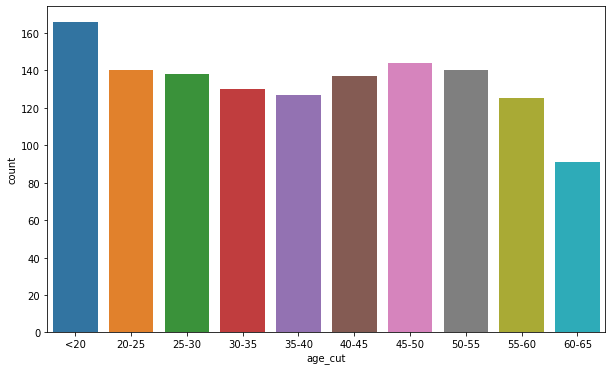

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_copy['age_cut'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

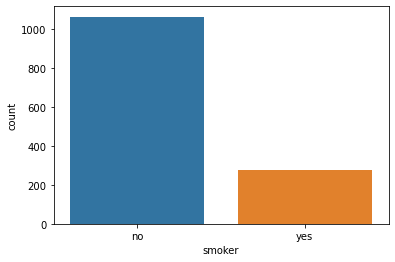

In [22]:
sns.countplot(x=df_copy['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

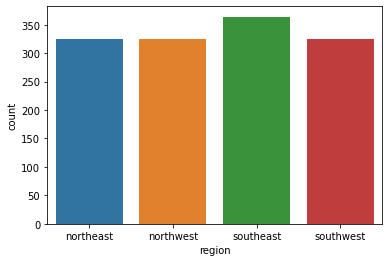

In [23]:
sns.countplot(x=df_copy['region'])

In [24]:
df_copy['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='viral load', ylabel='Count'>

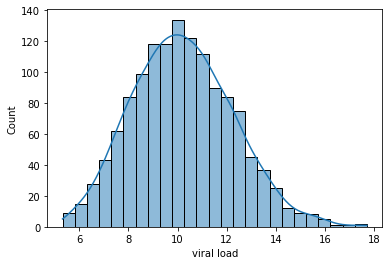

In [25]:
sns.histplot(x=df_copy['viral load'],kde=True)

<AxesSubplot:xlabel='severity level', ylabel='count'>

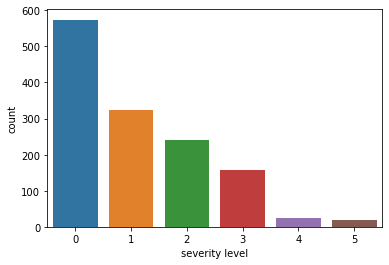

In [26]:
sns.countplot(x=df_copy['severity level'])

<AxesSubplot:xlabel='hospitalization charges', ylabel='Count'>

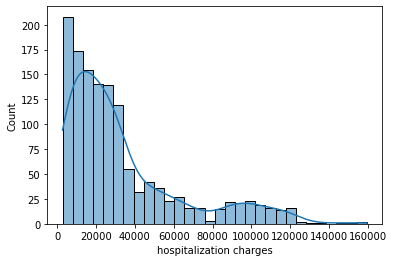

In [27]:
sns.histplot(x=df_copy['hospitalization charges'],kde=True)

<AxesSubplot:xlabel='hospitalization charges'>

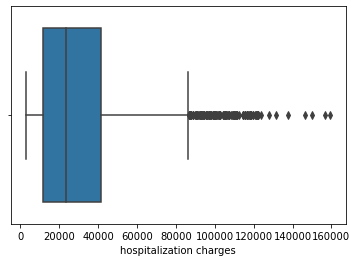

In [28]:
sns.boxplot(x=df_copy['hospitalization charges'])

In [29]:
df_copy['smoker'].replace(['yes','no'],[1,0],inplace = True)

In [30]:
df_copy['sex'].replace(['male','female'],[1,0],inplace = True)

In [31]:
df_copy['region'].replace(['northeast','northwest','southeast','southwest'],[1,2,3,4],inplace = True)

In [32]:
df_copy['severity level']=df_copy['severity level'].astype('int64')

In [33]:
df_copy.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_cut
0,19,0,1,4,9.30,0,42212,<20
1,18,1,0,3,11.26,1,4314,<20
2,28,1,0,3,11.00,3,11124,25-30
3,33,1,0,2,7.57,0,54961,30-35
4,32,1,0,2,9.63,0,9667,30-35


In [34]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


## Bivariate Analysis

In [35]:
df_copy.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges', 'age_cut'],
      dtype='object')

<AxesSubplot:>

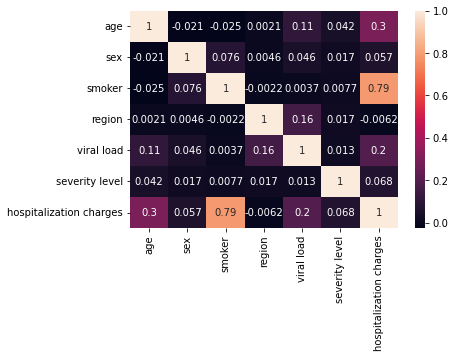

In [36]:
sns.heatmap(df_copy.corr(),annot=True)

<AxesSubplot:xlabel='hospitalization charges', ylabel='sex'>

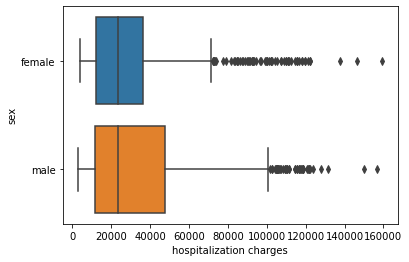

In [37]:
sns.boxplot(x=df['hospitalization charges'],y=df['sex'])

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

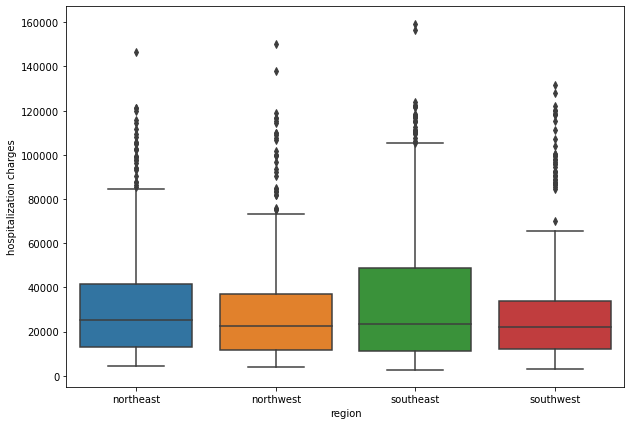

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(y=df['hospitalization charges'],x=df['region'])

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

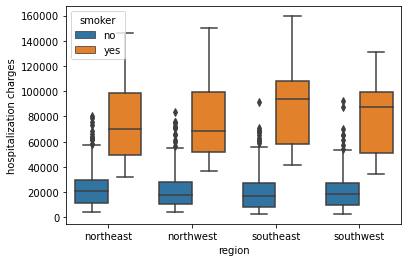

In [39]:
sns.boxplot(y=df['hospitalization charges'],x=df['region'],hue=df['smoker'])

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

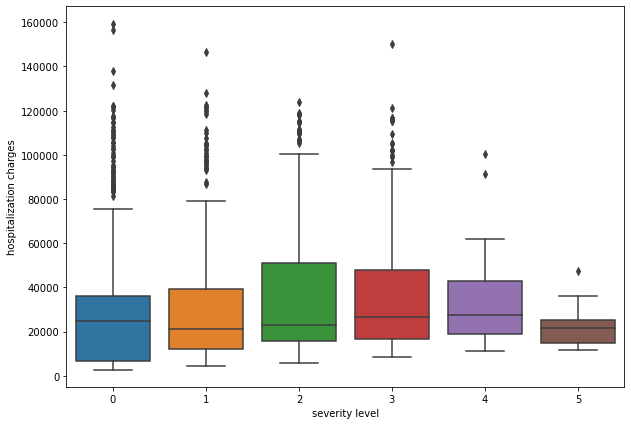

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(y=df['hospitalization charges'],x=df['severity level'])

<AxesSubplot:xlabel='age_cut', ylabel='hospitalization charges'>

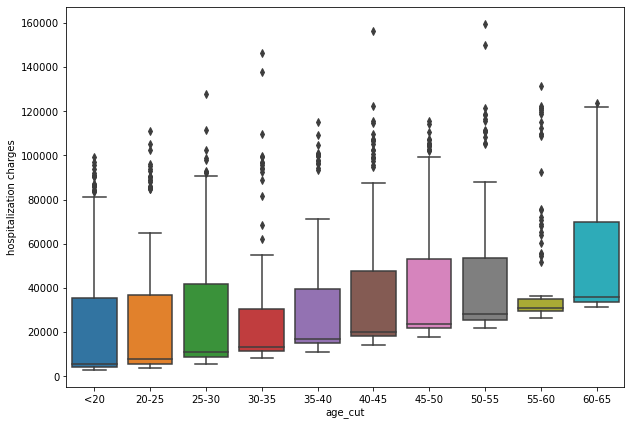

In [41]:
plt.figure(figsize=(10,7))
sns.boxplot(y=df_copy['hospitalization charges'],x=df_copy['age_cut'])


<AxesSubplot:>

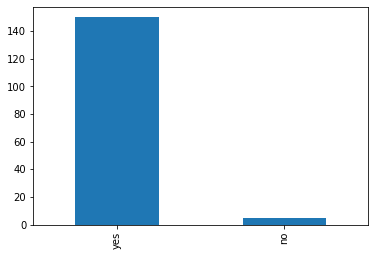

In [42]:
df[df['hospitalization charges']>80000]['smoker'].value_counts().plot(kind='bar')

<AxesSubplot:>

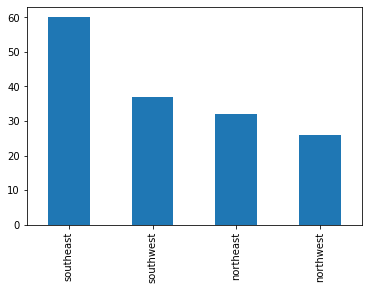

In [43]:
df[df['hospitalization charges']>80000]['region'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

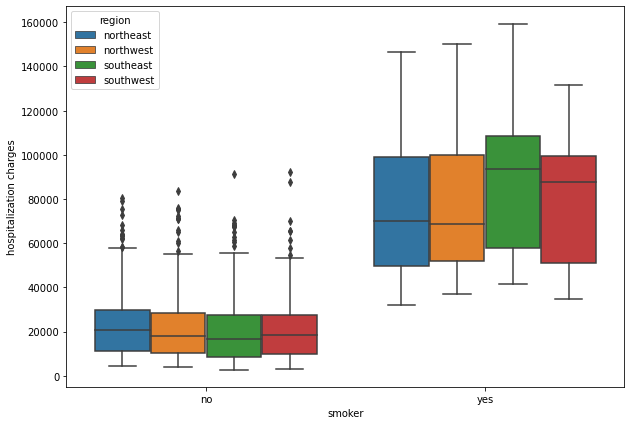

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(y=df['hospitalization charges'],x=df['smoker'],hue=df['region'])

<AxesSubplot:xlabel='age_cut', ylabel='hospitalization charges'>

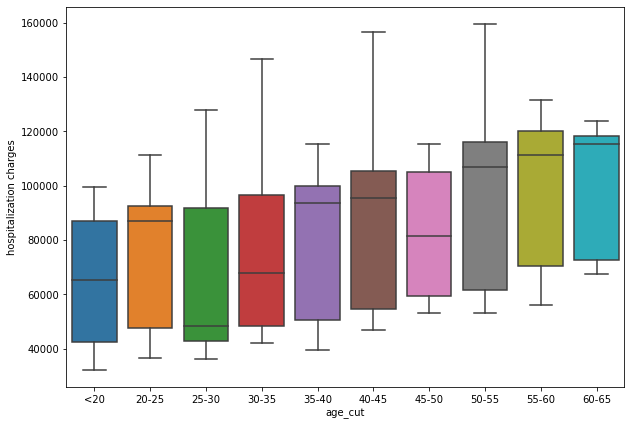

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(y='hospitalization charges',x='age_cut',data=df_copy[df_copy['smoker']==1])

<AxesSubplot:xlabel='age_cut', ylabel='hospitalization charges'>

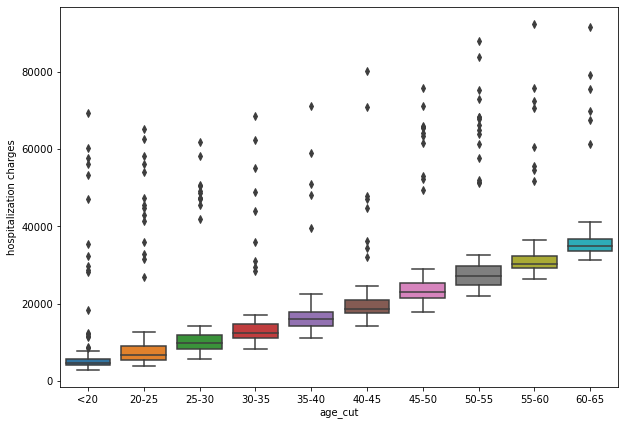

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(y='hospitalization charges',x='age_cut',data=df_copy[df_copy['smoker']==0])

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

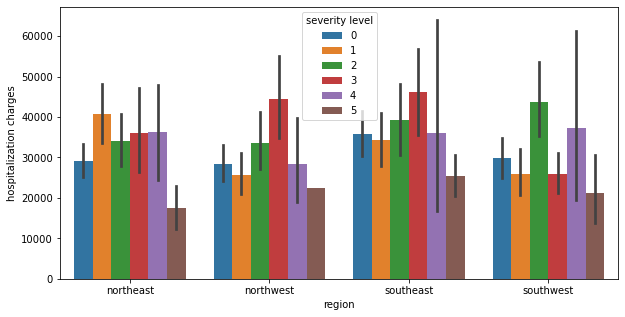

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(df['region'],df['hospitalization charges'],hue=df['severity level'])

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

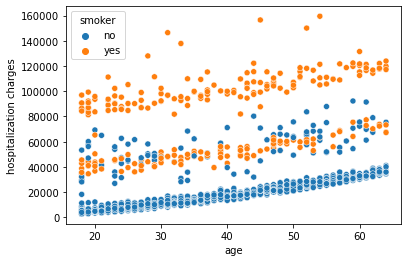

In [48]:
sns.scatterplot(y=df['hospitalization charges'],x=df['age'],hue=df['smoker'])

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

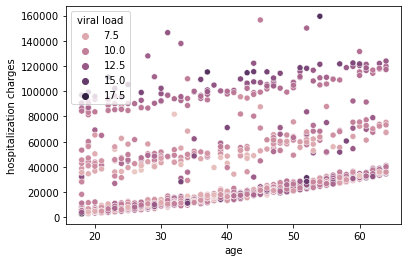

In [49]:
sns.scatterplot(y=df['hospitalization charges'],x=df['age'],hue=df['viral load'])

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

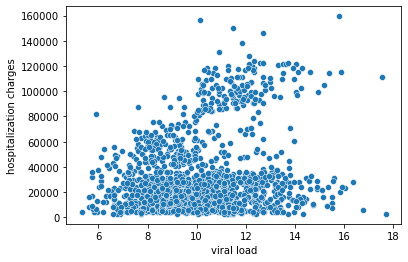

In [50]:
sns.scatterplot(y=df['hospitalization charges'],x=df['viral load'])

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

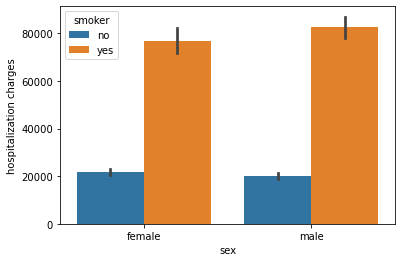

In [51]:
sns.barplot(df['sex'],df['hospitalization charges'],hue=df['smoker'])

## Outliers

In [52]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

In [53]:
q1=df['viral load'].quantile(0.25)
q3=df['viral load'].quantile(0.75)
IQR=q3-q1

outliers = df[((df['viral load']<(q1-1.5*IQR)) | (df['viral load']>(q3+1.5*IQR)))]
(len(outliers)/df.shape[0])*100

0.672645739910314

In [54]:
q1=df['hospitalization charges'].quantile(0.25)
q3=df['hospitalization charges'].quantile(0.75)
IQR=q3-q1

outliers = df[((df['hospitalization charges']<(q1-1.5*IQR)) | (df['hospitalization charges']>(q3+1.5*IQR)))]
len(outliers)/df.shape[0]*100

10.388639760837071

## Hypothesis Testing

### Hospitalization charges vs Smoking

##### Normality:

In [55]:
# Normality check
hc_smoker = df[df['smoker']=='yes']['hospitalization charges'].reset_index() # df for people who smoke
hc_nonsmoker = df[df['smoker']=='no']['hospitalization charges'].reset_index() # df for people who doesn't smoke

<AxesSubplot:title={'center':'log of non-smoker'}, xlabel='hospitalization charges', ylabel='Count'>

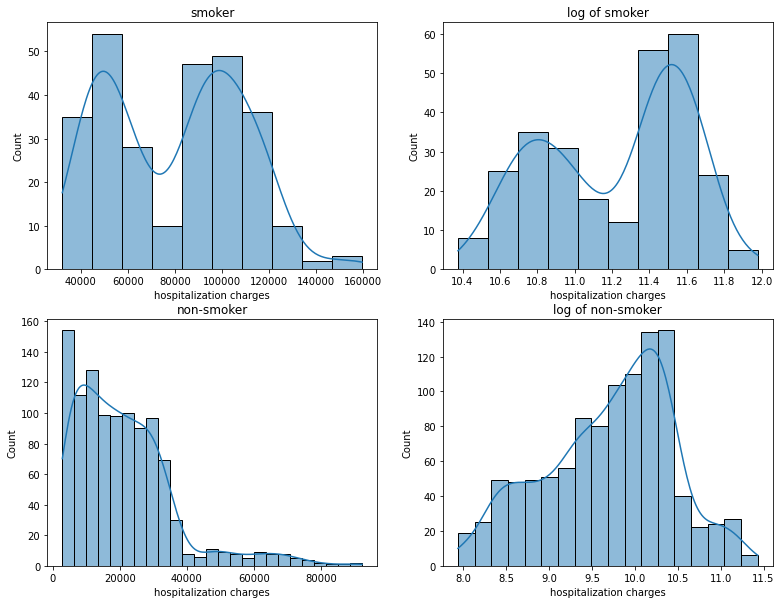

In [56]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.title('smoker')
sns.histplot(x=hc_smoker['hospitalization charges'],kde=True)
plt.subplot(2,2,2)
plt.title('log of smoker')
sns.histplot(np.log(hc_smoker['hospitalization charges']),kde=True)
plt.subplot(2,2,3)
plt.title('non-smoker')
sns.histplot(x=hc_nonsmoker['hospitalization charges'],kde=True)
plt.subplot(2,2,4)
plt.title('log of non-smoker')
sns.histplot(x=np.log(hc_nonsmoker['hospitalization charges']),kde=True)

In [57]:
z,p=stats.shapiro(np.log(hc_smoker['hospitalization charges'])) #Normality test
if p > 0.05 :
    print('The distribution of the sample is Normal/Gaussian as the p-value is :',p )
else:
    print('The distribution of the sample is not Normal/Gaussian as the p-value is :',p )

The distribution of the sample is not Normal/Gaussian as the p-value is : 3.4734257137181146e-10


In [58]:
z,p=stats.shapiro(np.log(hc_nonsmoker['hospitalization charges'])) #Normality test
if p > 0.05 :
    print('The distribution of the sample is Normal/Gaussian as the p-value is :',p )
else:
    print('The distribution of the sample is not Normal/Gaussian as the p-value is :',p )

The distribution of the sample is not Normal/Gaussian as the p-value is : 3.2253915250440857e-12


##### Variance Check:

In [59]:
z,p = stats.levene(np.log(hc_smoker['hospitalization charges']),np.log(hc_nonsmoker['hospitalization charges']))
if p > 0.05 :
    print('The variance of two samples are similar as the p-value is :',p )
else:
    print('The variance of two samples are different as the p-value is :',p )

The variance of two samples are different as the p-value is : 1.332832802389931e-20


##### T-Test

In [60]:
z,p = stats.ttest_ind(np.log(hc_smoker['hospitalization charges']).sample(50),
                np.log(hc_nonsmoker['hospitalization charges']).sample(50),
                alternative='greater',
                equal_var=False)
if p > 0.05:
    print('Smoking will not effect the hospotalization charges as the p-value is :',p )
else:
    print('Smoking has sigificant effect on the hospotalization charges as the p-value is :',p )

Smoking has sigificant effect on the hospotalization charges as the p-value is : 1.837750903481087e-23


### Viral load vs Sex

In [61]:
# Normality check
vl_male = df[df['sex']=='male']['hospitalization charges'].reset_index() # df for people who smoke
vl_female = df[df['sex']=='female']['hospitalization charges'].reset_index() # df for people who doesn't smoke

##### Normality check:

<AxesSubplot:title={'center':'log of non-smoker'}, xlabel='hospitalization charges', ylabel='Count'>

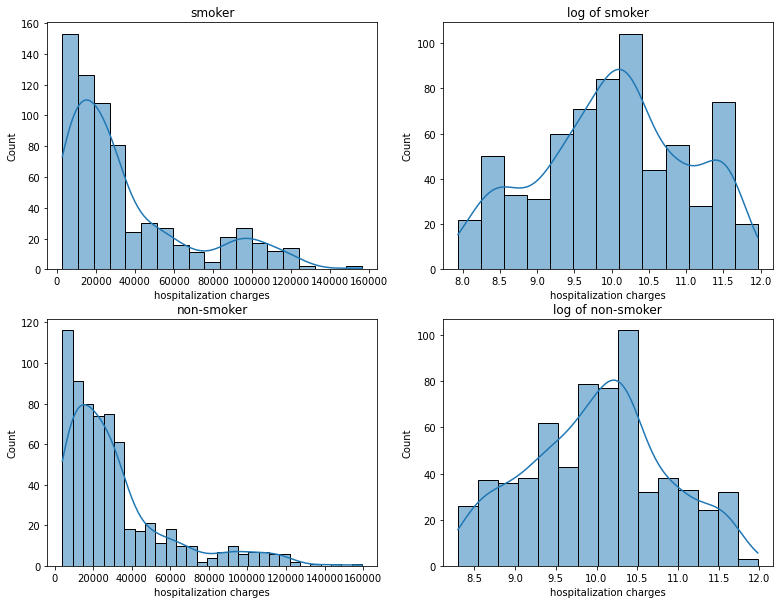

In [62]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.title('smoker')
sns.histplot(x=vl_male['hospitalization charges'],kde=True)
plt.subplot(2,2,2)
plt.title('log of smoker')
sns.histplot(np.log(vl_male['hospitalization charges']),kde=True)
plt.subplot(2,2,3)
plt.title('non-smoker')
sns.histplot(x=vl_female['hospitalization charges'],kde=True)
plt.subplot(2,2,4)
plt.title('log of non-smoker')
sns.histplot(x=np.log(vl_female['hospitalization charges']),kde=True)

In [63]:
z,p=stats.shapiro(np.log(vl_male['hospitalization charges'])) #Normality test
if p > 0.05 :
    print('The distribution of the sample is Normal/Gaussian as the p-value is :',p )
else:
    print('The distribution of the sample is not Normal/Gaussian as the p-value is :',p )

The distribution of the sample is not Normal/Gaussian as the p-value is : 1.9388513017304376e-09


In [64]:
z,p=stats.shapiro(np.log(vl_female['hospitalization charges'])) #Normality test
if p > 0.05 :
    print('The distribution of the sample is Normal/Gaussian as the p-value is :',p )
else:
    print('The distribution of the sample is not Normal/Gaussian as the p-value is :',p )

The distribution of the sample is not Normal/Gaussian as the p-value is : 2.822575424943352e-06


##### Variance check:

In [65]:
z,p = stats.levene(np.log(vl_male['hospitalization charges']),np.log(vl_female['hospitalization charges']))
if p > 0.05 :
    print('The variance of two samples are similar as the p-value is :',p )
else:
    print('The variance of two samples are different as the p-value is :',p )

The variance of two samples are different as the p-value is : 0.00011511498124919069


##### T test

In [66]:
z,p = stats.ttest_ind(np.log(vl_female['hospitalization charges']).sample(50),
                np.log(vl_male['hospitalization charges']).sample(50),
                equal_var=False)
if p > 0.05:
    print('Male/Female does not effect the viral load as the p value is:',p )
else:
    print('Male/Female effects the viral load as the p value is :',p )

Male/Female effects the viral load as the p value is : 0.016837507702017997


### Smoking among different regions

In [67]:
contingency_table = pd.crosstab(df['smoker'],df['region'])
contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [68]:
observed_values = contingency_table.values
print('Observed Values:-\n', observed_values)

Observed Values:-
 [[257 267 273 267]
 [ 67  58  91  58]]


In [69]:
stat,p,dof,expected_values = stats.chi2_contingency(observed_values)
print('Expected Values :-\n',expected_values,'\n\n')
if p > 0.05:
    print('Proportion of smoking is similar across different regions')
else:
    print('Proportion of smoking significantly different across different regions')

Expected Values :-
 [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]] 


Proportion of smoking is similar across different regions


### Effect of severity level on women

In [70]:
severity_level_0 = df[(df['sex'] == 'female') & (df['severity level'] == 0)]['viral load'].reset_index()
severity_level_1 = df[(df['sex'] == 'female') & (df['severity level'] == 1)]['viral load'].reset_index()
severity_level_2 = df[(df['sex'] == 'female') & (df['severity level'] == 2)]['viral load'].reset_index()

##### Normality 

<AxesSubplot:xlabel='viral load', ylabel='Density'>

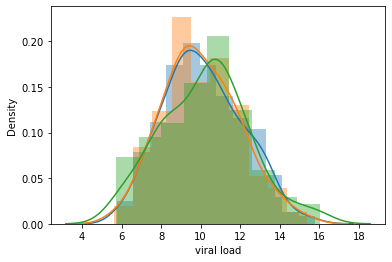

In [71]:
sns.distplot(severity_level_0['viral load'], kde=True)
sns.distplot(severity_level_1['viral load'], kde=True)
sns.distplot(severity_level_2['viral load'], kde=True)

In [75]:
z0,p0=stats.shapiro(severity_level_0['viral load'])
z1,p1=stats.shapiro(severity_level_1['viral load'])
z2,p2=stats.shapiro(severity_level_2['viral load'])
p0,p1,p2

(0.038132064044475555, 0.539344072341919, 0.2586005926132202)

##### Variance check

In [73]:
stats.levene(severity_level_0['viral load'],severity_level_1['viral load'],severity_level_2['viral load'])

LeveneResult(statistic=0.9435131022565071, pvalue=0.38987253596513605)

##### Anova

In [74]:
stats.f_oneway(severity_level_0['viral load'],severity_level_1['viral load'],severity_level_2['viral load'])

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

### INSIGHTS

### Recommendations